## Load in Packages

In [34]:
import pandas as pd
import numpy as np
import os

### Load in Lockdown Dates to determine cutoff of data

In [35]:
#https://www.kaggle.com/datasets/jcyzag/covid19-lockdown-dates-by-country
lock_down_df = pd.read_csv('C:/Users/Andrew/Documents/Uni Trier/Semester 4/Numerics Seminar/lockdown/countryLockdowndates.csv')
lock_down_df = lock_down_df[['Country/Region', 'Province', 'Date']]

### Load In Population counts from John's Hopkins (JH) Dataset

In [36]:
#https://github.com/CSSEGISandData/COVID-19
pop_count = pd.read_csv('C:/Users/Andrew/Documents/Uni Trier/Semester 4/Numerics Seminar/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv')
#Rename for Consistency with Covid Infection report
pop_count = pop_count.rename(columns={'Country_Region':'Country/Region', 'Province_State':'Province/State'})
#Get Aggregate population based on Country and Province
pop_count_regional = pop_count.groupby(['Country/Region', 'Province/State'], as_index=False).agg({'Population':sum})
#Remove 0 population entries
# pop_count_regional = pop_count_regional[(pop_count_regional != 0).all(1)]
pop_count_country = pop_count.groupby(['Country/Region'], as_index=False).agg({'Population':sum})
pop_count_country = pop_count_country[(pop_count_country != 0).all(1)]

### JH Daily Covid 19 case dataset has incorrect figures and inconsistent labeling

In [250]:
os.chdir('C:/Users/Andrew/Documents/Uni Trier/Semester 4/Numerics Seminar/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/')
Daily_Infected_Regional_Df = pop_count_regional[['Country/Region', 'Province/State']]
for csv_f in os.listdir():
    if csv_f[-8:-4] == '2020':
        if int(csv_f[0:2])  < 4:
            if csv_f == '03-24-2020.csv':
                break 
            tmp_df = pd.read_csv(csv_f)
            #reconcile different naming conventions
            tmp_df = tmp_df.rename(columns={'Country_Region':'Country/Region', 'Province_State':'Province/State'})
            tmp_df = tmp_df[['Province/State', 'Country/Region', 'Confirmed']]
            #Inconsistent Naming
            tmp_df = tmp_df.replace('Mainland China', 'China')
            
            # add_rows = tmp_df
            # add_rows = add_rows['Province/State'].isin(Daily_Infected_Regional_Df['Province/State'])
            # if add_rows[~add_rows].to_list():
            #     add_rows = tmp_df[~add_rows][['Country/Region','Province/State']]
            #     add_rows[list(Daily_Infected_Regional_Df.columns[2:])] = pd.DataFrame([np.zeros(len(list(Daily_Infected_Regional_Df.columns[2:])))], index=add_rows.index)
            #     Daily_Infected_Regional_Df = pd.concat([Daily_Infected_Regional_Df, add_rows])
            Daily_Infected_Regional_Df = pd.merge(Daily_Infected_Regional_Df, tmp_df, how='left', left_on=['Country/Region', 'Province/State'], right_on=['Country/Region', 'Province/State'])
            Daily_Infected_Regional_Df['Confirmed'] = Daily_Infected_Regional_Df.Confirmed.replace(np.nan, 0)
            Daily_Infected_Regional_Df = Daily_Infected_Regional_Df.rename(columns={'Confirmed':csv_f[:-4]})

In [275]:
Daily_Infected_Country_Df = Daily_Infected_Regional_Df.groupby(['Country/Region'], as_index=False).sum()
Daily_Infected_Country_Df

,Country/Region,01-22-2020,01-23-2020,01-24-2020,01-25-2020,01-26-2020,01-27-2020,01-28-2020,01-29-2020,01-30-2020,...,03-14-2020,03-15-2020,03-16-2020,03-17-2020,03-18-2020,03-19-2020,03-20-2020,03-21-2020,03-22-2020,03-23-2020
0,Australia,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,9.0,...,250.0,297.0,377.0,452.0,568.0,681.0,791.0,1071.0,1490.0,1682.0
1,Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Canada,0.0,0.0,0.0,0.0,3.0,3.0,4.0,4.0,4.0,...,451.0,547.0,700.0,854.0,1097.0,1349.0,1692.0,2196.0,2652.0,3297.0
4,Chile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,China,994.0,1088.0,1477.0,2196.0,3180.0,4382.0,9204.0,9840.0,13300.0,...,150108.0,150150.0,150184.0,150210.0,150255.0,150312.0,150406.0,150461.0,150562.0,150656.0
6,Colombia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Denmark,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,11.0,18.0,47.0,58.0,74.0,82.0,94.0,119.0,122.0
8,France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,14.0,17.0,31.0,9.0,15.0,20.0,26.0,199.0,20120.0
9,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### JH also provides a (correct) time series version of their data

In [29]:
ts_df =pd.read_csv('C:/Users/Andrew/Documents/Uni Trier/Semester 4/Numerics Seminar/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
ts_df.drop(['Lat', 'Long'], axis=1, inplace=True)
#Check for Nan values in the count 
ts_df.loc[:,ts_df.columns[2:]].isnull().values.any()
ts_df = ts_df.groupby(['Country/Region'], as_index=False).sum()

In [37]:
ts_df.loc[ts_df['Country/Region'] == 'Germany']
pop_count_country

,Country/Region,Population
0,Afghanistan,38928341.0
1,Albania,2877800.0
2,Algeria,43851043.0
3,Andorra,77265.0
4,Angola,32866268.0
...,...,...
196,West Bank and Gaza,5101416.0
197,Western Sahara,597330.0
199,Yemen,29825968.0
200,Zambia,18383956.0


In [60]:
Germany_Infections = ts_df.loc[ts_df['Country/Region'] == 'Germany'].drop(['Country/Region'], axis=1)
Germany_Infections

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/21/22,11/22/22,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22
67,0,0,0,0,0,1,4,4,4,5,...,36247081,36280371,36318461,36348477,36373164,36373164,36373165,36419717,36463485,36499600


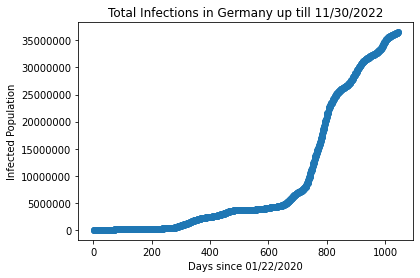

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize

ydata = Germany_Infections.to_numpy()[0]
xdata = [x for x in range(1, len(Germany_Infections.to_numpy()[0])+1)]

ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

def sir_model(y, x, alpha, beta):
    S = -alpha * y[0] * y[1] / N
    R = beta * y[1]
    I = -(S + R)
    return S, I, R

def fit_odeint(x, alpha, beta):
    return integrate.odeint(sir_model, (S0, I0, R0), x, args=(alpha, beta))[:,1]

N = 1.0
I0 = ydata[0]
S0 = N - I0
R0 = 0.0

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)
plt.ticklabel_format(style='plain')
plt.plot(xdata, ydata, 'o')
# plt.plot(xdata, fitted)
plt.title('Total Infections in Germany up till 11/30/2022')
plt.xlabel('Days since 01/22/2020')
plt.ylabel('Infected Population')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return (x+1)**(-2) * np.sin(2*np.pi*x)
startwert = 1
def euler(x, y0, fx):
    '''Numerische Lösung einer Differentialgleichung.
    x ist ein Array der Stützstellen. 
    y0 ist die Anfangsbedingung. 
    fx ist die Funktion f(x).'''
    N = len(x)-1
    y = np.zeros(N+1)
    y[0] = y0
    dy = fx(x) # Ableitungen von y an Stellen x_k
    h = (x[len(x)-1] - x[0])/N
    for k in range(N):
        y[k+1] = y[k] + h*dy[k]
    return y
fig, ax = plt.subplots()
for n in [1000, 200, 50, 20]:
    x = np.linspace(0, 5, n+1)
    y = euler(x, startwert, f)
    ax.plot(x, y, label='N='+str(n))
ax.set_xlabel('x')
ax.set_ylabel('y(x)')